<a href="https://colab.research.google.com/github/vinayak2019/organic_chem/blob/main/Day1/Conformers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
# @title Run this cell to install the necessary software. { display-mode: "form" }

#@markdown This should take a minute to run.

! pip install pyscf
! pip install rdkit
! pip install geometric
! pip install py3Dmol

import os
import sys
import pyscf
import py3Dmol
import matplotlib.pyplot as plt

from pyscf.hessian import thermo
from pyscf import gto, scf, dft, tools, lo
from pyscf.geomopt.geometric_solver import optimize

from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole

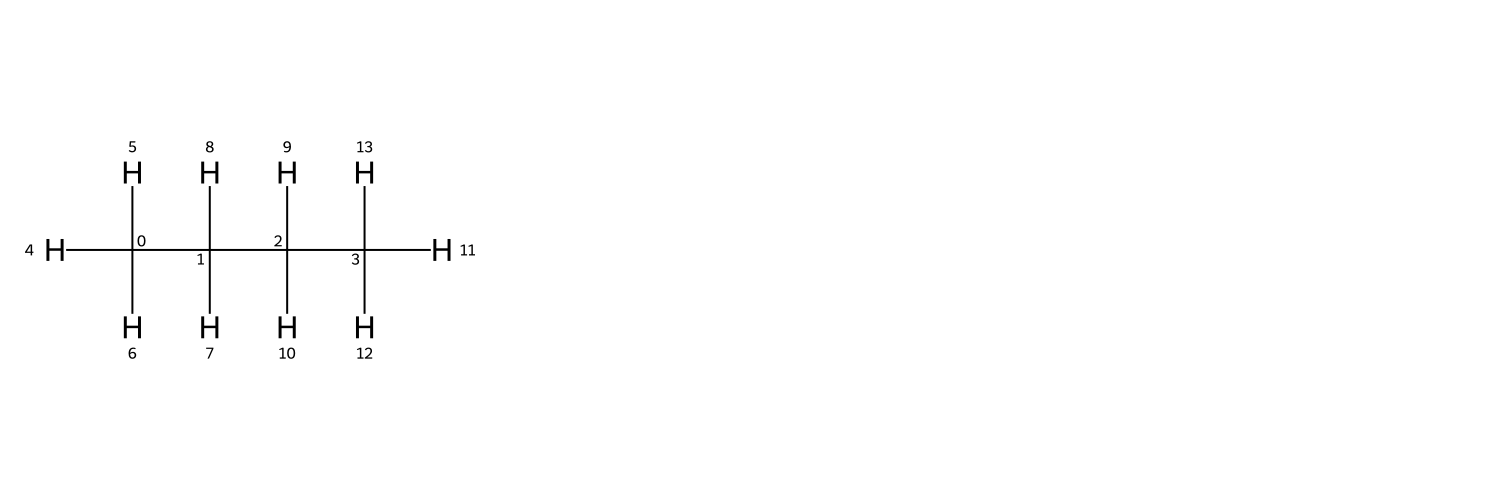

In [ ]:
from IPython.core.display import Image
IPythonConsole.drawOptions.addAtomIndices = True

#@title Load molecule { run: "auto" }
#@markdown Here we will load the molecule using SMILES representation. The SMILES representation can be generated at https://pubchem.ncbi.nlm.nih.gov//edit3/index.html. Copy the smiles text into this cell.

smiles = "CCCC" #@param {type:"string"}


molecule_name = "molecule"
# drawing_style = "stick" #@param ['stick', 'sphere', 'line','carton']

# Establish RDKit mol object
rd_mol = Chem.MolFromSmiles(smiles)
rdmol_hs = Chem.rdmolops.AddHs(rd_mol)
im = Draw.MolsToGridImage([rdmol_hs],subImgSize=(500,500))
AllChem.EmbedMolecule(rdmol_hs)
AllChem.MMFFOptimizeMolecule(rdmol_hs)
im


In [ ]:
#@title Run DFT calculations

#@markdown **atom_list**: numbers for 4 consecutive atoms

#@markdown **rotation_max**: the rotation starts at 0 degree and this value sets the max. Usually 360

#@markdown **increment**: increments of angle to compute the energy



from copy import deepcopy

data = []
mol_rd = deepcopy(rdmol_hs)

atoms_list = 8,1,2,9 #@param
rotation_max = 360 #@param
increment = 10 #@param

functional = "B3LYP" #@param ["B3LYP", "wb97x"]
basis_set = "3-21G" #@param ["3-21G","6-31G"]


! rm -fr mols && mkdir mols

for i in range(0,rotation_max+increment,increment):
  Chem.AllChem.SetDihedralDeg(mol_rd.GetConformer(0),atoms_list[0],atoms_list[1],atoms_list[2],atoms_list[3],float(i))
  Chem.MolToXYZFile(mol_rd, "mols/{}_{}.xyz".format(molecule_name,i))



  # Set parameters
  mol = gto.M(atom=F'mols/{molecule_name}_{i}.xyz',  # Establish PySCF mol object
              basis = basis_set,
              verbose=0
              )
  mf = mol.KS()
  mf.xc = functional  # Set functional
  mf.kernel()
  data.append([i,round(mf.e_tot,3)])



print("Calculations complete")



Calculations complete


In [ ]:
#@title Plot the data

import pandas as pd
import matplotlib.pyplot as plt


df = pd.DataFrame(data,columns=["Angle","Energy"]).set_index("Angle")
df['Energy'].plot(kind='line', figsize=(8, 4))
plt.gca().spines[['top', 'right']].set_visible(False)
plt.ylabel("Energy")

In [ ]:
#@title Use slider to set angle for the conformer { run: "auto" }

from IPython.core.display import Image
import ipywidgets as widgets

slider = widgets.IntSlider(value=5, min= 0, max=rotation_max, step=increment)
display(slider)

In [ ]:
#@title View the conformer { run: "auto" }

with open("mols/{}_{}.xyz".format(molecule_name,slider.value)) as f:
  xyz = f.read()
v = py3Dmol.view()
v.addModel(xyz, 'xyz')
v.setStyle({'stick':{}})
v.show()

## Task
Find the most stable and least stable configurations of the following molecules. Draw the Newman projections for the same in your lab notebook. The 4 atoms you need to change the angles are highlighted in red.

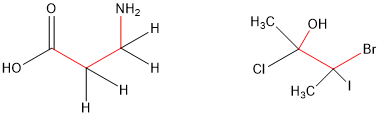
